In [74]:
import plotly.graph_objects as go
import json
import networkx as nx
import matplotlib. pyplot as plt

lm_file = "les_miserables.json"

with open(lm_file, 'r') as j:
     contents = json.loads(j.read())

In [76]:
nodes = contents["nodes"]
edges = contents["links"]

labels = dict()
G = nx.Graph()
for node in nodes:
    G.add_node(node["id"], name=node["name"])
    labels[node["id"]] = node["name"]

In [78]:
for edge in edges:
    G.add_edge(edge["source"], edge["target"], weight=edge["value"])

*Detect Centrality*:  
Degree centrality - measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections.

In [79]:
from heapq import nlargest

dc = nx.degree_centrality(G)

characters = nlargest(5, dc, key=dc.__getitem__)
Degree = [labels[character] for character in characters]

print("The most central character in Les Miserables is {}, followed by {}, {}, {} and {}.".format(Degree[0], Degree[1], Degree[2], Degree[3], Degree[4]))

The most central character in Les Miserables is Valjean, followed by Gavroche, Marius, Javert and Thenardier.


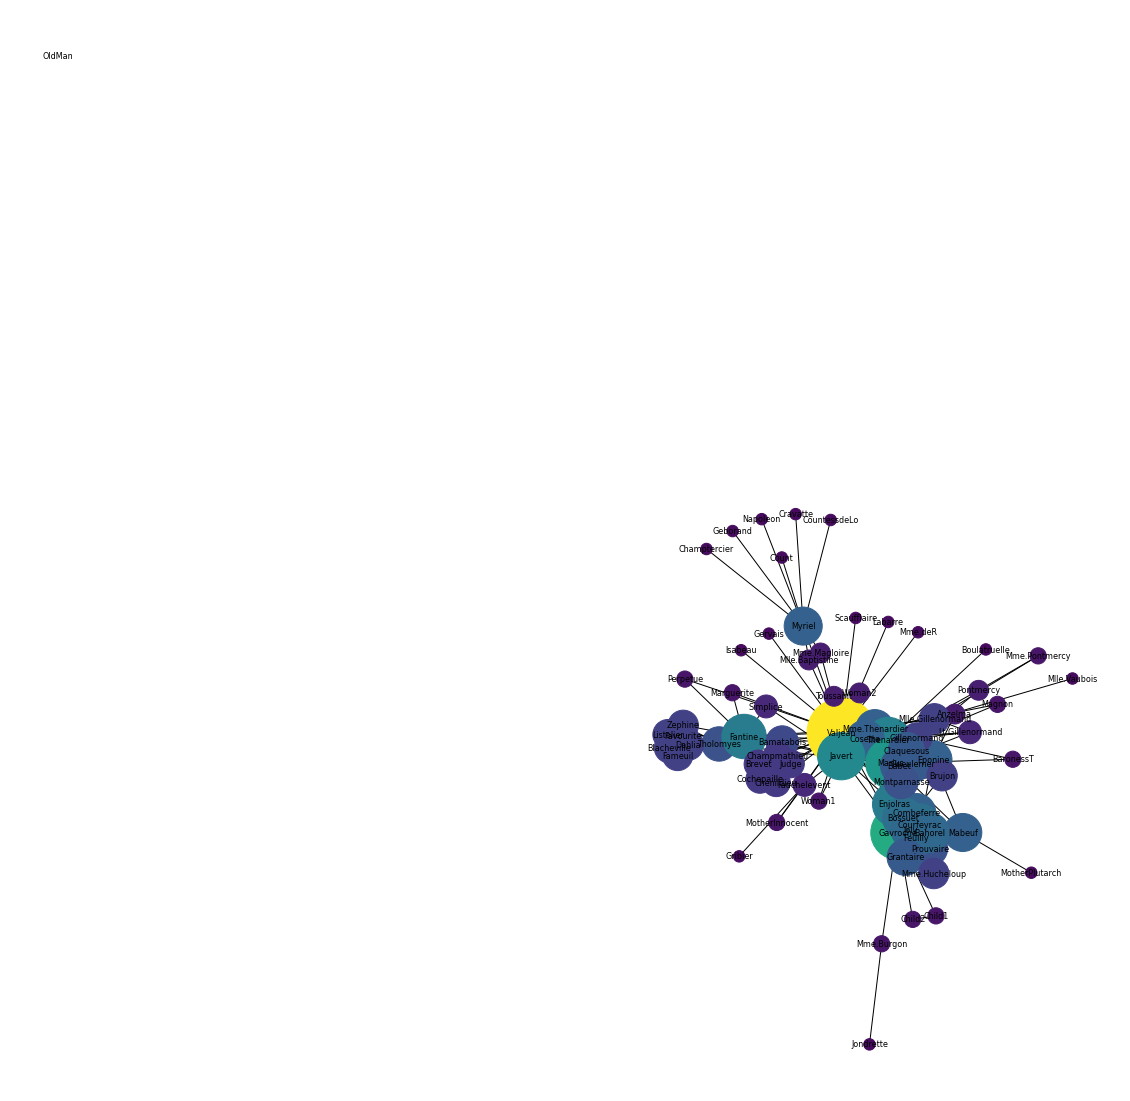

In [80]:
pos = nx.spring_layout(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in dc.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, labels=labels, font_size=8)
plt.axis('off')
plt.show()

*Problem: this does not take into consideration the weights of the links.*

Page Rank - Computed by either iteratively distributing one node’s rank (originally based on the degree) over its neighbors or by randomly traversing the graph and counting the frequency of hitting each node during these walks. With this approach we take into account the weight of the links.


In [81]:
pagerank = nx.pagerank(G)

characters = nlargest(5, pagerank, key=pagerank.__getitem__)
PageRank = [labels[character] for character in characters]

# they are in order: Valjean is "the most central"

print("The most central character in Les Miserables is {}, followed by {}, {}, {} and {}.".format(PageRank[0], PageRank[1], PageRank[2], PageRank[3], PageRank[4]))

The most central character in Les Miserables is Valjean, followed by Marius, Cosette, Enjolras and Myriel.


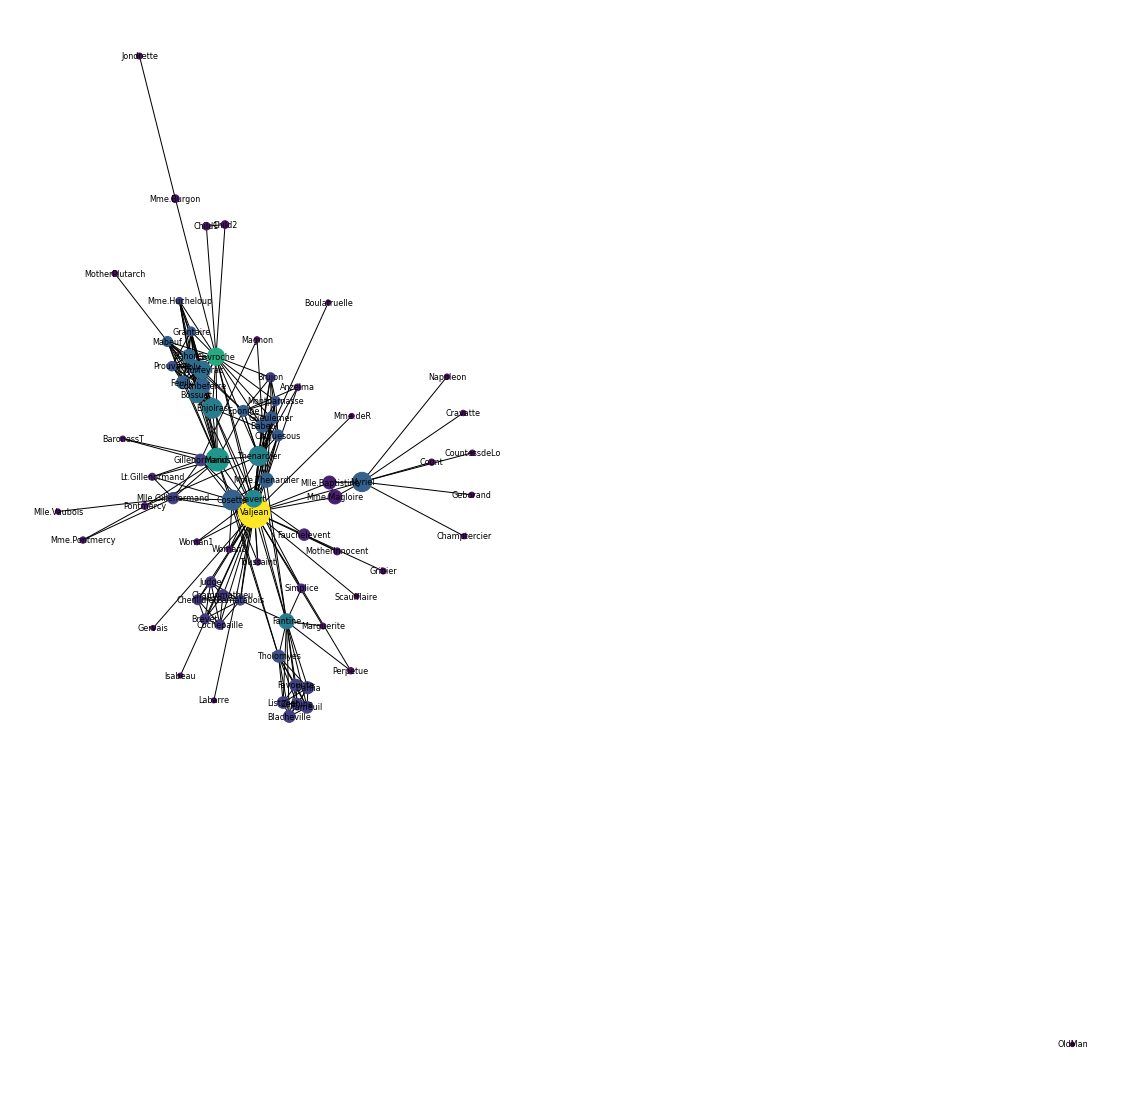

In [82]:
pos = nx.spring_layout(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in pagerank.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, labels=labels, font_size=8)
plt.axis('off')
plt.show()

Betweenness Centrality - represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. Also takes into consideration the weight of the edge.



In [83]:
betweenness = nx.betweenness_centrality(G, endpoints=True)

characters = nlargest(5, betweenness, key=betweenness.__getitem__)
Centrality = [labels[character] for character in characters]

# they are in order: Valjean is "the most central"

print("The most central character in Les Miserables is {}, followed by {}, {}, {} and {}.".format(Centrality[0], Centrality[1], Centrality[2], Centrality[3], Centrality[4]))

The most central character in Les Miserables is Valjean, followed by Gavroche, Myriel, Marius and Fantine.


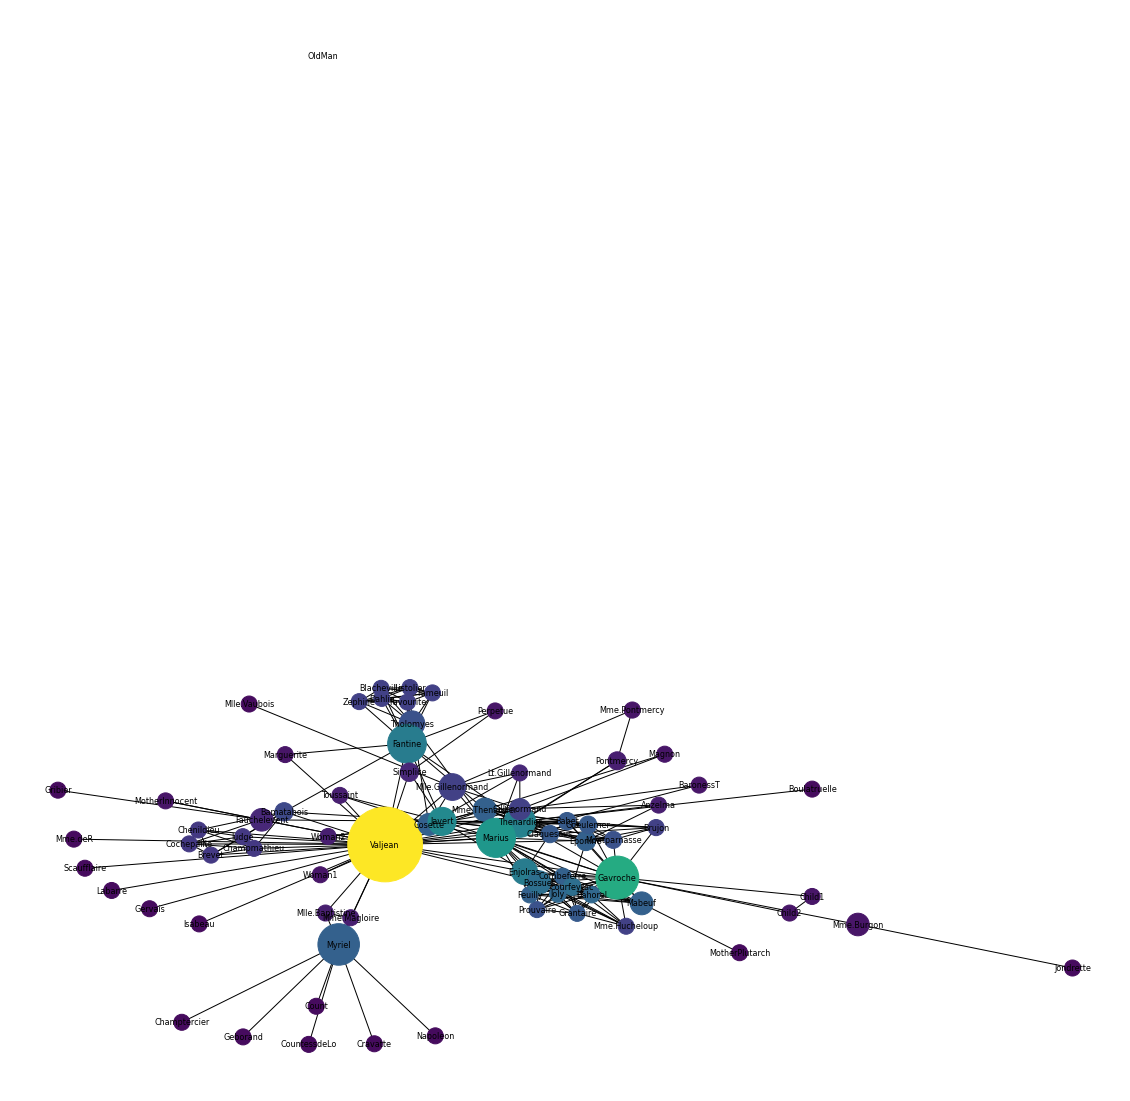

In [84]:
pos = nx.spring_layout(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betweenness.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, labels=labels, font_size=8)
plt.axis('off')
plt.show()